Uploading Kaggle Username  to download Datasets

---



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshilsharaf","key":"56eab5fec787c7e5d62b25115160e37f"}'}

Uploading kaggle dataset directly into  google colab


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!ls



drive  kaggle.json  sample_data


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip new-plant-diseases-dataset.zip
#!ls

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_180deg.JPG  
  inflating: new plant diseases dataset(augmented)/New

In [ ]:
import tensorflow as tf
import os

Now preprocess image

In [ ]:
!ls
data_dir = os.path.join('New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'valid')
test_dir=os.path.join('test','test')

 drive					  new-plant-diseases-dataset.zip
 kaggle.json				  sample_data
'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'


In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))
print('total images for test :', count(test_dir))

total images for training : New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train : 70295files
total images for validation : New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid : 17572files
total images for test : test/test : 33files


Now I will upload categories.json file which will create classes

In [ ]:
files.upload()

Saving categories.json to categories.json


{'categories.json': b'{"Apple___Apple_scab": "Apple___Apple_scab", "Apple___Black_rot": "Apple___Black_rot", "Apple___Cedar_apple_rust": "Apple___Cedar_apple_rust", "Apple___healthy": "Apple___healthy", "Blueberry___healthy": "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew": "Cherry_(including_sour)___Powdery_mildew", "Cherry_(including_sour)___healthy": "Cherry_(including_sour)___healthy", "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_": "Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight": "Corn_(maize)___Northern_Leaf_Blight", "Corn_(maize)___healthy": "Corn_(maize)___healthy", "Grape___Black_rot": "Grape___Black_rot", "Grape___Esca_(Black_Measles)": "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Grape___healthy": "Grape___healthy", "Orange___Haunglongbing_(Citrus_greening)": "Orange__

In [ ]:
import json

with open('categories.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes[35])
print('Number of classes:',len(classes))

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Number of classes: 38


In [ ]:
IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 #@param {type:"integer"}

**Data Loading and Data Augmentation**

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam,SGD


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=64)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    test_dir, 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
   
    target_size=IMAGE_SHAPE,
    batch_size=2)

do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
     
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=64)

Using TensorFlow backend.


Found 17572 images belonging to 38 classes.
Found 0 images belonging to 0 classes.
Found 70295 images belonging to 38 classes.


**Trying NASNetMobile**

In [ ]:
from keras.applications.nasnet import NASNetMobile

train_num = train_generator.samples
valid_num = validation_generator.samples
model=Sequential()
model.add(NASNetMobile(include_top=False,input_shape=(224,224,3)))
#model.add(BatchNormalization(axis=1))
model.add(Flatten())
model.add(Dense(38,activation='softmax'))

model.compile(optimizer=SGD(lr=1e-2, momentum=0.9, decay=5e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



19996672/19993432 [==============================] - 1s 0us/step


**Fitting The Model**

In [ ]:
history=model.fit_generator(train_generator,
                         steps_per_epoch=train_num//400,
                         validation_data=validation_generator,
                         epochs=50,
                         validation_steps=valid_num//50,
                         )

Epoch 1/50
175/175 [==============================] - 424s 2s/step - loss: 1.1828 - accuracy: 0.7182 - val_loss: 1.5241 - val_accuracy: 0.0917
Epoch 2/50
175/175 [==============================] - 359s 2s/step - loss: 0.1917 - accuracy: 0.9391 - val_loss: 4.7544 - val_accuracy: 0.0854
Epoch 3/50
175/175 [==============================] - 358s 2s/step - loss: 0.1150 - accuracy: 0.9629 - val_loss: 1.4051 - val_accuracy: 0.1535
Epoch 4/50
175/175 [==============================] - 358s 2s/step - loss: 0.0867 - accuracy: 0.9722 - val_loss: 2.4526 - val_accuracy: 0.2579
Epoch 5/50
175/175 [==============================] - 359s 2s/step - loss: 0.0660 - accuracy: 0.9778 - val_loss: 4.6969 - val_accuracy: 0.2342
Epoch 6/50
175/175 [==============================] - 359s 2s/step - loss: 0.0524 - accuracy: 0.9829 - val_loss: 3.2913 - val_accuracy: 0.3464
Epoch 7/50
175/175 [==============================] - 359s 2s/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 1.9813 - val_accuracy: 0.3781

In [ ]:
print(tf.__version__)

2.2.0


**Saving The Model**

In [ ]:
model.save('/content/drive/My Drive/Trained Models(Leaf Identification)/Test7(NASNetMobile[Tensorflow_V2]).h5')

**Visualization Of Graph**

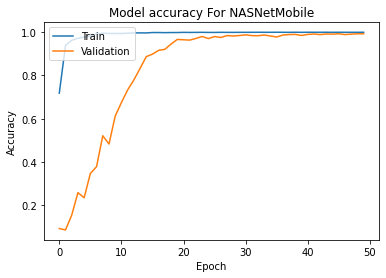

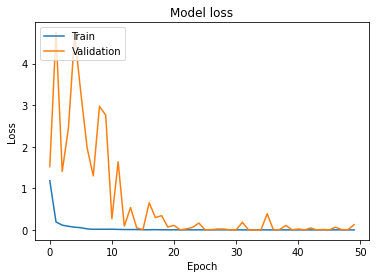

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy For NASNetMobile')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
!wget https://cropwatch.unl.edu/styles/hero/public/images/hero/2018/corn-Goss-NCLB-lesions-same-leaf.jpg?itok=rf8lYfKq

--2020-04-25 09:59:59--  https://cropwatch.unl.edu/styles/hero/public/images/hero/2018/corn-Goss-NCLB-lesions-same-leaf.jpg?itok=rf8lYfKq
Resolving cropwatch.unl.edu (cropwatch.unl.edu)... 54.211.17.237, 3.222.180.108, 34.234.125.145
Connecting to cropwatch.unl.edu (cropwatch.unl.edu)|54.211.17.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67199 (66K) [image/jpeg]
Saving to: ‘corn-Goss-NCLB-lesions-same-leaf.jpg?itok=rf8lYfKq.1’

corn-Goss-NCLB-lesi 100%[===================>]  65.62K  --.-KB/s    in 0.08s   

2020-04-25 09:59:59 (798 KB/s) - ‘corn-Goss-NCLB-lesions-same-leaf.jpg?itok=rf8lYfKq.1’ saved [67199/67199]



**Testing NASNetMobile**

In [ ]:
!pip install Pillow


In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/content/test/test/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
print(image_list)    

[]


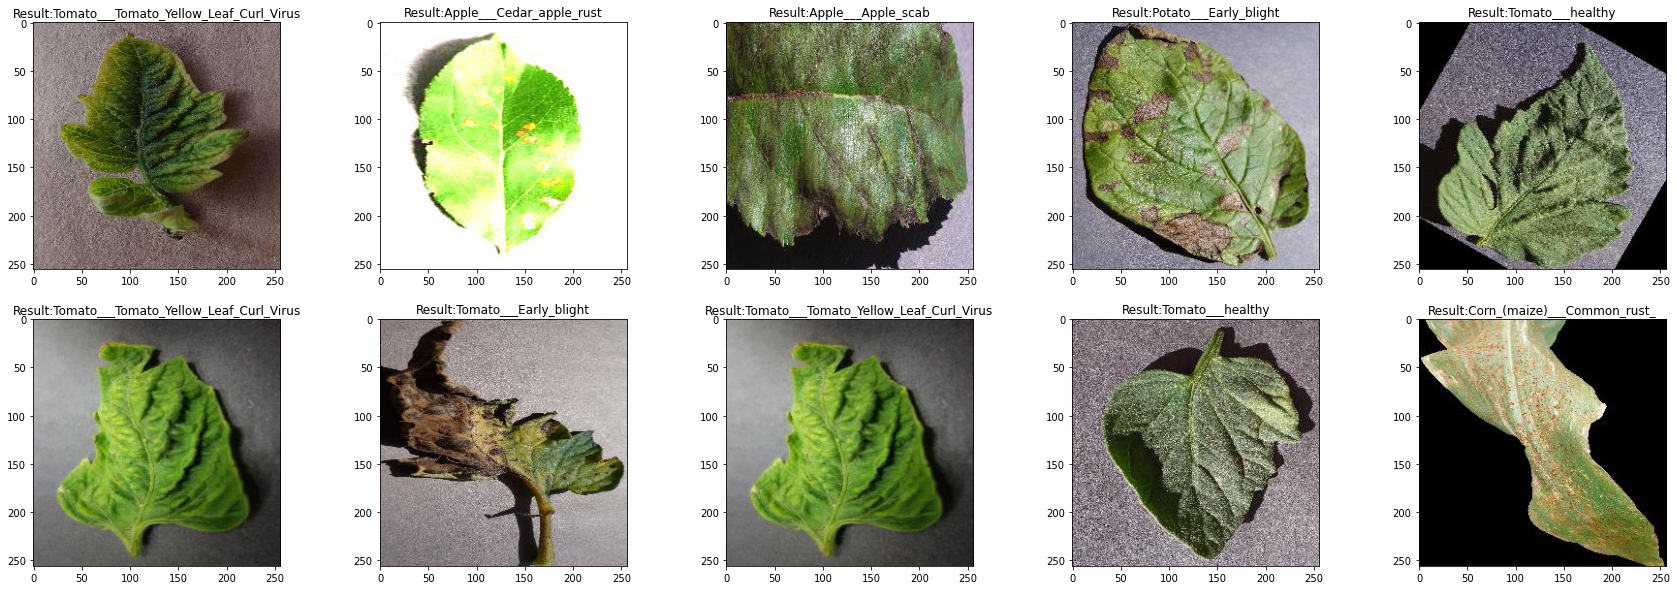

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

loaded=load_model('/content/drive/My Drive/Trained Models(Leaf Identification)/Test5(MobileNetV2).h5')

def prepare(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
w = 20
h = 20
fig = plt.figure(figsize=(30 ,10))
columns = 5
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots

path=[]
path=['/content/test/test/TomatoYellowCurlVirus1.JPG','/content/test/test/AppleCedarRust1.JPG','/content/test/test/AppleScab3.JPG','/content/test/test/PotatoEarlyBlight1.JPG','/content/test/test/TomatoHealthy3.JPG','/content/test/test/TomatoYellowCurlVirus4.JPG','/content/test/test/TomatoEarlyBlight1.JPG','/content/test/test/TomatoYellowCurlVirus4.JPG','/content/test/test/TomatoHealthy1.JPG','/content/test/test/CornCommonRust3.JPG']
image_list = []
for x in range(10):
  image_list = prepare(path[x])
for i in range(columns*rows): 
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    result = loaded.predict_classes([prepare(path[i])])
    ax[-1].set_title("Result:"+classes[int(result)])  # set title
    img=image.load_img(path[i])
    plt.imshow(img)

# do extra plots on selected axes/subplots
# note: index starts with 0
#ax[2].plot(xs, 3*ys)
#ax[19].plot(ys**2, xs)

plt.show()    
#result = loaded.predict_classes([prepare('/content/test/test/TomatoYellowCurlVirus1.JPG')])
#disease=image.load_img('/content/test/test/TomatoYellowCurlVirus1.JPG')
#plt.imshow(disease)
#print (classes[int(result)])


In [ ]:
batch_holder = np.zeros((33, 224, 224, 3))

for i,img in enumerate(sorted(os.listdir(test_dir))):
  #img = image.load_img(os.path.join(test_dir,img), target_size=(224,224))
  print(os.path.join(test_dir,img))
  batch_holder[i, :] = prepare(os.path.join(test_dir,img))

print(len(batch_holder) ) 

test/test/AppleCedarRust1.JPG
test/test/AppleCedarRust2.JPG
test/test/AppleCedarRust3.JPG
test/test/AppleCedarRust4.JPG
test/test/AppleScab1.JPG
test/test/AppleScab2.JPG
test/test/AppleScab3.JPG
test/test/CornCommonRust1.JPG
test/test/CornCommonRust2.JPG
test/test/CornCommonRust3.JPG
test/test/PotatoEarlyBlight1.JPG
test/test/PotatoEarlyBlight2.JPG
test/test/PotatoEarlyBlight3.JPG
test/test/PotatoEarlyBlight4.JPG
test/test/PotatoEarlyBlight5.JPG
test/test/PotatoHealthy1.JPG
test/test/PotatoHealthy2.JPG
test/test/TomatoEarlyBlight1.JPG
test/test/TomatoEarlyBlight2.JPG
test/test/TomatoEarlyBlight3.JPG
test/test/TomatoEarlyBlight4.JPG
test/test/TomatoEarlyBlight5.JPG
test/test/TomatoEarlyBlight6.JPG
test/test/TomatoHealthy1.JPG
test/test/TomatoHealthy2.JPG
test/test/TomatoHealthy3.JPG
test/test/TomatoHealthy4.JPG
test/test/TomatoYellowCurlVirus1.JPG
test/test/TomatoYellowCurlVirus2.JPG
test/test/TomatoYellowCurlVirus3.JPG
test/test/TomatoYellowCurlVirus4.JPG
test/test/TomatoYellowCurlViru

In [ ]:

result=loaded.predict_classes(batch_holder)
print(type(result))
print(result)
res=[]
for i in range(32):
   temp=result[i]
   res.insert(i,classes[temp])
print(res)

<class 'numpy.ndarray'>
[ 2  2  2  2  0  0  0  8  8  8 20 20 20 20 20 22 22 29 29 29 29 29 29 37
 37 37 37 35 35 35 35 35 35]
['Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___healthy', 'Potato___healthy', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus

**Confusion Matrix**

In [ ]:
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
 

true_classes = [2,2,2,2,0,0,0,8,8,8,20,20,20,20,20,22,22,29,29,29,29,29,29,37,37,37,37,35,35,35,35,35,35]
print(len(true_classes))
class_labels=[] 
j=0
for j in range(32):
    i=int(true_classes[j])
    class_labels.insert(j,classes[i])
  
print(class_labels) 
print('Classification Report') 
report = classification_report(class_labels,res)
print(report)  
print('Confusion Matrix')
print(confusion_matrix(class_labels,res))


33
['Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___healthy', 'Potato___healthy', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
Classification Report
                                        precision    recall  f1-score   support

                 

**Converting Keras Model To Tensorflow Lite**

In [ ]:

model = tf.keras.models.load_model('/content/drive/My Drive/Trained Models(Leaf Identification)/Test7(NASNetMobile[Tensorflow_V2]).h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/My Drive/Trained Models(Leaf Identification)/converted_model.tflite", "wb").write(tflite_model)

24879756

**Using MobileNetV2**

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
loaded=load_model('/content/drive/My Drive/Trained Models(Leaf Identification)/Test4(Inceptionv3).h5')


batch_holder = np.zeros((33, 224, 224, 3))

for i,img in enumerate(sorted(os.listdir(test_dir))):
  #img = image.load_img(os.path.join(test_dir,img), target_size=(224,224))
  print(img)
  batch_holder[i, :] = prepare(os.path.join(test_dir,img))

print(len(batch_holder) ) 

AppleCedarRust1.JPG
AppleCedarRust2.JPG
AppleCedarRust3.JPG
AppleCedarRust4.JPG
AppleScab1.JPG
AppleScab2.JPG
AppleScab3.JPG
CornCommonRust1.JPG
CornCommonRust2.JPG
CornCommonRust3.JPG
PotatoEarlyBlight1.JPG
PotatoEarlyBlight2.JPG
PotatoEarlyBlight3.JPG
PotatoEarlyBlight4.JPG
PotatoEarlyBlight5.JPG
PotatoHealthy1.JPG
PotatoHealthy2.JPG
TomatoEarlyBlight1.JPG
TomatoEarlyBlight2.JPG
TomatoEarlyBlight3.JPG
TomatoEarlyBlight4.JPG
TomatoEarlyBlight5.JPG
TomatoEarlyBlight6.JPG
TomatoHealthy1.JPG
TomatoHealthy2.JPG
TomatoHealthy3.JPG
TomatoHealthy4.JPG
TomatoYellowCurlVirus1.JPG
TomatoYellowCurlVirus2.JPG
TomatoYellowCurlVirus3.JPG
TomatoYellowCurlVirus4.JPG
TomatoYellowCurlVirus5.JPG
TomatoYellowCurlVirus6.JPG
33


In [ ]:

result=loaded.predict_classes(batch_holder)
print(type(result))
print(result)
res=[]
for i in range(32):
   temp=result[i]
   res.insert(i,classes[temp])
print(res)

<class 'numpy.ndarray'>
[ 2  2  2  2  0  0  7  8  8  8 20 20 20 20 20 22 22 30 29 29 29 29 29 37
 37 37 37 35 35 35 35 35 35]
['Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___healthy', 'Potato___healthy', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score
import numpy as np
 


true_classes = [2,2,2,2,0,0,0,8,8,8,20,20,20,20,20,22,22,29,29,29,29,29,29,37,37,37,37,35,35,35,35,35,35]
print(len(true_classes))
class_labels=[] 
j=0
for j in range(32):
    i=int(true_classes[j])
    class_labels.insert(j,classes[i])
  
print(class_labels) 
print('Classification Report') 

report = classification_report(class_labels,res)
print(report)  
print('Confusion Matrix')
print(confusion_matrix(class_labels,res))

print("Accuracy: ", accuracy_score(true_classes, result))
print("Precision: ", precision_score(true_classes, result, average = 'micro'))
print("Recall: ", recall_score(true_classes, result, average = 'micro'))

33
['Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight', 'Potato___healthy', 'Potato___healthy', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
Classification Report
                                                    precision    recall  f1-score   support

     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
